## *COPM3602-project / Car Price Anaylsis*

---
### Contents : 
**Part 1**

1. [Dataset URL and pervious analysis on it](#url)
2. [About the Dataset](#about)
3. [Attributes Description](#description)
4. [Research questions](#question)
5. [Explore the data](#explore)
6. [Frequency distribution of all attributes](#allAttributes)
7. [Frequency distribution table for continues numerical attributes](#numerical)

**Part 2**

1. [Fill mising values with the mean of that column](#fillNa)
2. [boxplots to indetify features with outliers, replace them with the mean of that feature](#boxplot)
3. [Use labelEncoder for catigorical features](#labelEncoder)
4. [Scale the features with minMax normalization](#minMax)
5. [Convert to wide formate](#convertWide)
6. [ANOVA & F-statistics](#anova)

---
### 1. Dataset URL and pervious analysis on it <a id = 'url'></a>
* [Dataset URL](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)
* [Previous analysis on the dataset](https://www.kaggle.com/code/farhanmayyeri/car-price-prediction-elasticnet-grid-search)

---
### 2. About the Dataset<a id = 'about'></a>
This dataset contains information of ~19000+ cars along with 18 attributes like price, manufacturer, cylinders...etc. The dataset can be used in many applications such as understanding the impact of different specification on car price as well as training ML model to predicte the car price.

---
### 3. Attributes Description<a id = 'description'></a>

| Attribute | Type | Descriptoin |
| :--- | :--- | :--- |
| ID | Numerical | Car Id from the collected source | 
| Price | Numerical | Car Price | 
| Levy | Numerical | Tax of importing and exporting the cars |
| Manufacturer | Categorical | Company that make the car |
| Model | Categorical | Car Model |
| Prod. year | Numerical | The year the car was made |
| Category | Categorical | The car category/ kind |
| Leather interior | Categorical | If the car seats made of leather |  
| Fuel Type | Categorical | The Type of car Fuel |
| Engine Volume | Numerical | The volume of fuel and air that can be pushed through a car's cylinders |  
| Mileage | Numerical | The number of miles that the car can travel | 
| Cylilnders | Numerical | Numer of Cyilders in the car |
| Gear Box Type | Categorical | The type of the gear box |
| Drive wheels | Categorical | Type of the wheel of a motor vehicle that transmits force |
| Doors | Numerical | Number of the doors |
| Wheel | Categorical | steering | 
| Color | Categorical | Car color |
| Airbags | Numerical | Number of airbags in the car |  

---

### 4. Research Questions<a id = 'question'></a>
---
**1. Is this a univariate or multivariate dataset?**

*Because it comprises many columns/features, this dataset is definitely multivariate.*

**2. can we call this dataset a structured data ?**

*It is structured data since it has a predefined format and is presented in tabular form.* 

**3. Are there any temporal data in this dataset ?**

*The dataset's temporal nature can be seen in the fact that  it comprises car prices over time.*

**4. What are the data types in this dataset?**

*This dataset primarily contains two data types: numeric and text.*

**5. What reading mode is used for this dataset?**

*Non-streaming staic mode.* 

**6. How can we describe the dataset's quality?**

*Due to certain missing values in one column and various notation issues in other columns, the data is a little noisy.*

**7. Is this dataset made up of actual data?**

*With a little investigation, it is simple to see that this data is artificial and may have been created for teaching and learning purposes.*

---

In [1]:
# import necessary libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

---
### 5. Explore the Data<a id = 'explore'></a>

In [2]:
# import the dataset
df = pd.read_csv('car-price.csv')

In [3]:
# take a quick look at the data 
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape

(19237, 18)

- Alright so we have 19237 observations and 18 attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

- It looks like we don't have any missing values, but from ```df.head()``` I can see that there's some missing value in the Levy attribute but they use "**-**" to note the missing value, we will alter that later
- Engine volume and mileage supposed to be numerical but they are assigned as an object, we need to modify that

In [6]:
# see how many missing value we have in the levy column
len(df[df.Levy == '-'])

5819

In [7]:
# replace the - with Nan values
df.Levy.replace({'-' : np.nan}, inplace = True)
# change the Levy data type to float64
df.Levy = df.Levy.astype('float64')

In [8]:
# see why engine volume is object type 
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

- some values have the word Turbo with it. We need to make another column for turbo with boolean variable, then we can remove the word turbo from the engine volume column

In [9]:
# see how many cars have turbo
df['Engine volume'].str.contains('Turbo').value_counts()

False    17306
True      1931
Name: Engine volume, dtype: int64

- There's 1931 cars with turbo

In [10]:
# adding a Turbo column 
df['Turbo'] = [True if "Turbo" in x else False for x in df['Engine volume']]

In [11]:
# check the new column 
df.Turbo.value_counts()

False    17306
True      1931
Name: Turbo, dtype: int64

In [12]:
# now we remove the word Turbo from the Engine volume column and convert the type to float64
df['Engine volume'] = df['Engine volume'].str.strip('Turbo').astype('float64')

In [13]:
df['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [14]:
# why is mileage assigned as object data type 
df.Mileage.unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

- the Mileage column contains some str "Km" we need to remove that and convert it to int64 data type 

In [15]:
df.Mileage = df.Mileage.str.rstrip('km').astype('int64')

- Doors column contain some text, we will replace that with numbers

In [16]:
df.Doors.replace({'04-May' : 4, '02-Mar' : 2, '>5' : 4}, inplace = True)

In [17]:
# see some basic statistics about the numerical attributes 
df.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.923700e+04,1.923700e+04,13418.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,906.838128,2010.912824,2.307990,1.532236e+06,4.582991,3.919218,6.582627
std,9.365914e+05,1.905813e+05,461.867051,5.668673,0.877805,4.840387e+07,1.199933,0.393759,4.320168
min,2.074688e+07,1.000000e+00,87.000000,1939.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,4.569837e+07,5.331000e+03,640.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.260000e+05,4.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,1058.000000,2015.000000,2.500000,1.888880e+05,4.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,4.000000,16.000000


1. the ID doesn't mean anything for us, we will dorp it
2. 50 % of the cars in the dataset was made in 2012 or before

In [18]:
# drop the Id column 
df.drop('ID', axis = 1, inplace = True)

- these values can't be real, we will replace them with the mean value of the price column

---
### 6. Frequency distribution of all attributes<a id = 'allAttributes'></a>

Text(0.5, 1.0, 'Price Frequency')

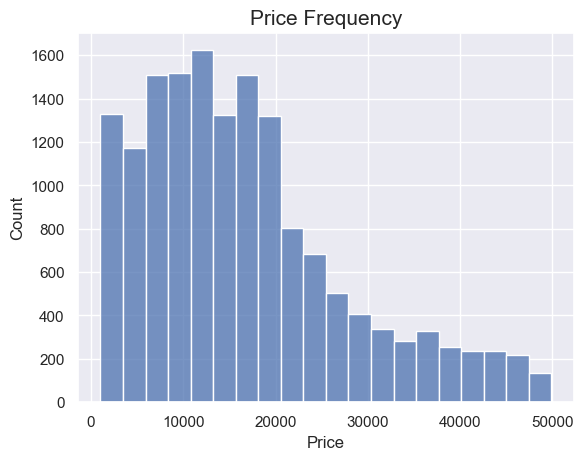

In [19]:
# Plot the prices of the vehicles         
sns.histplot(df[(df.Price > 1000) & (df.Price < 50000)].Price, bins = 20).set_title('Price Frequency', fontdict = {'size' : 15})

- Most cars prices range between 10000 to 20000
- This frequency displays the prices of cars that has a range of [1000,50000].

Text(0.5, 1.0, 'Levy Frequency Distribution')

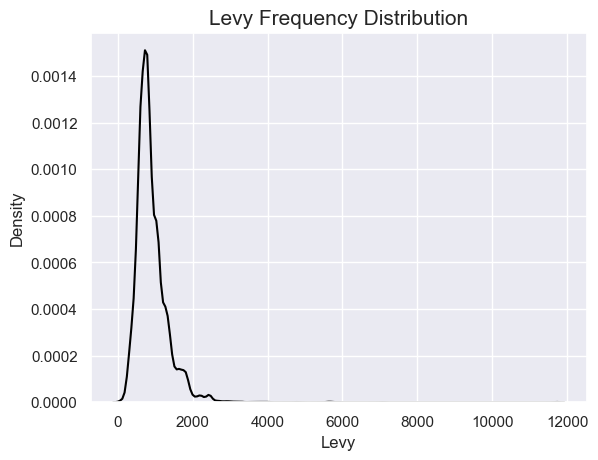

In [20]:
# Plot frequency of levy
sns.kdeplot(data = df, x = 'Levy', color = 'black').set_title('Levy Frequency Distribution', fontdict = {'size' : 15})

- Most values are between 0 and 2000 

Text(0.5, 1.0, 'Top 10 Cars Manufacturer')

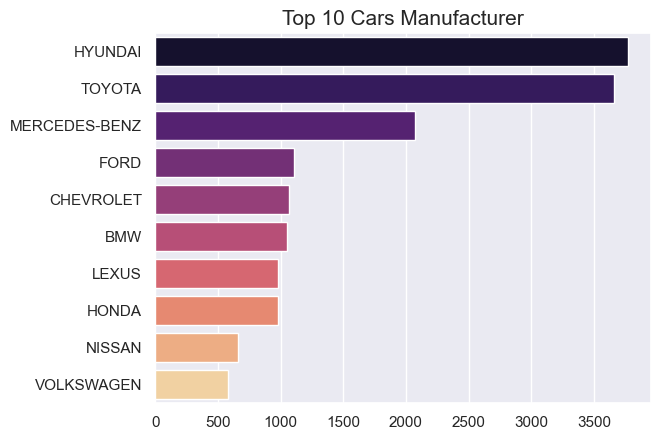

In [21]:
topTenCars = df.Manufacturer.value_counts()[:10]
sns.barplot(x = topTenCars.values, y = topTenCars.index, palette = 'magma').set_title('Top 10 Cars Manufacturer', fontdict = {'size' : 15})

Text(0.5, 1.0, 'Top 10 Cars Models')

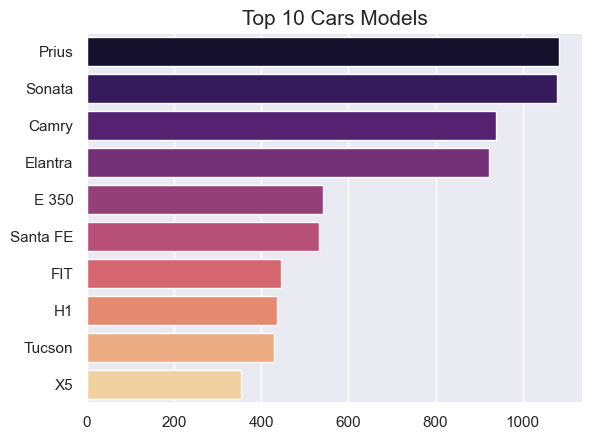

In [22]:
topTenModels = df.Model.value_counts()[:10]
sns.barplot(x = topTenModels.values, y = topTenModels.index, palette = 'magma').set_title('Top 10 Cars Models', fontdict = {'size' : 15})

Text(0.5, 1.0, 'Cars production years')

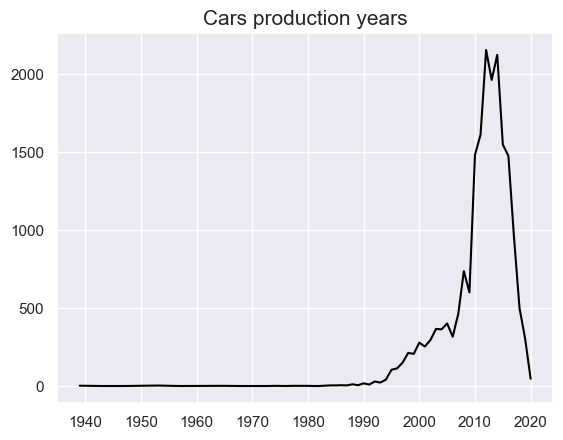

In [23]:
years = df['Prod. year'].value_counts()
sns.lineplot(x = years.index, y = years.values, color = 'black').set_title('Cars production years', fontdict = {'size' : 15})

- Most cars were made from 2006 to 2015

Text(0.5, 1.0, 'Cars Categories')

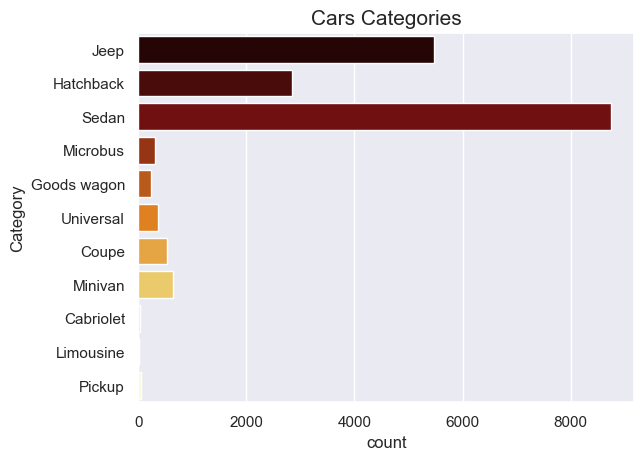

In [24]:
sns.countplot(data = df, y = 'Category', palette = 'afmhot').set_title('Cars Categories', fontdict = {'size' : 15})

- The most common car categories are:
1. Sedan 
2. Jeep
3. Hatchback

Text(0.5, 1.0, 'Cars Fuel type')

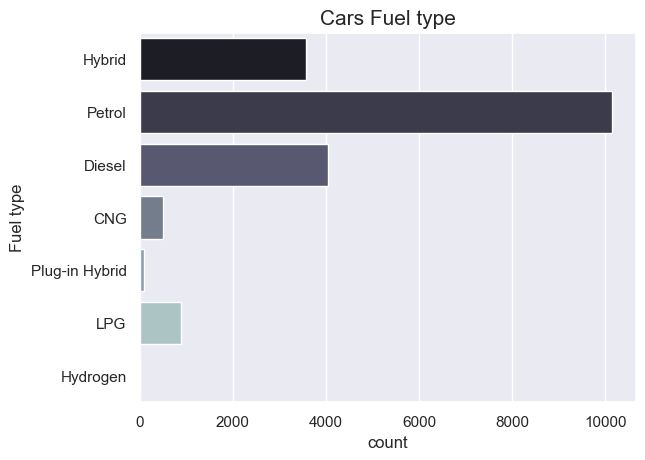

In [25]:
sns.countplot(data = df, y = 'Fuel type', palette = 'bone').set_title('Cars Fuel type', fontdict = {'size' : 15})

- The most common fuel type are :
1. Petrol
2. Diesel
3. Hybrid

Text(0.5, 1.0, 'Engine volume Frequency')

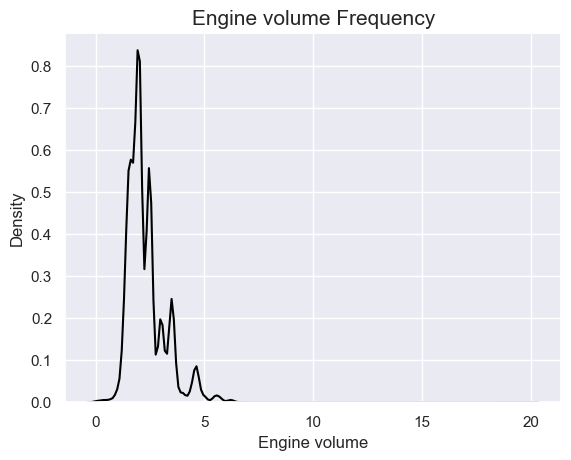

In [26]:
sns.kdeplot(df['Engine volume'], color = 'black').set_title('Engine volume Frequency', fontdict = {'size' : 15})

Text(0.5, 1.0, 'Cylinders Count')

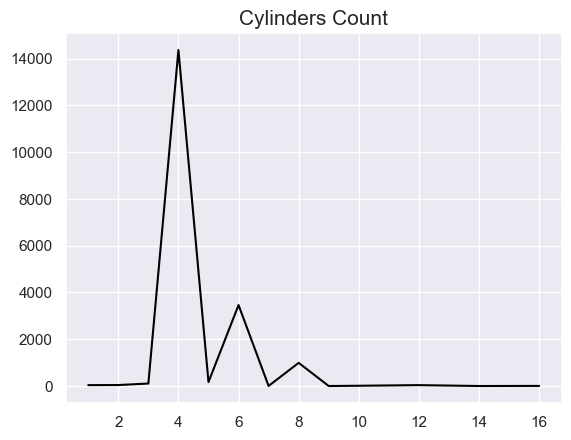

In [27]:
cylinders = df.Cylinders.value_counts()
sns.lineplot(x = cylinders.index, y = cylinders.values, color = 'black').set_title('Cylinders Count', fontdict = { 'size' : 15})

- most of the cars in the dataset are 4.0 cylinders

Text(0.5, 1.0, 'Gear box type count')

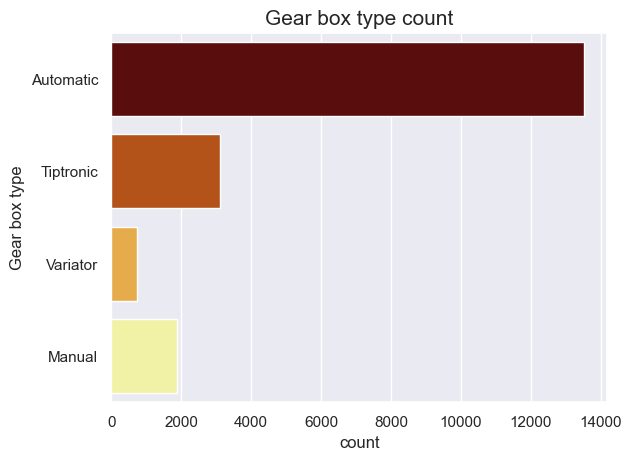

In [28]:
sns.countplot(data = df, y = 'Gear box type', palette = 'afmhot').set_title("Gear box type count", fontdict = {'size':15})

- Automatic and Manual are the most widely used gearbox. Tiptronic is another variant of automatic gearbox.

Text(0.5, 1.0, 'Drive Wheels count')

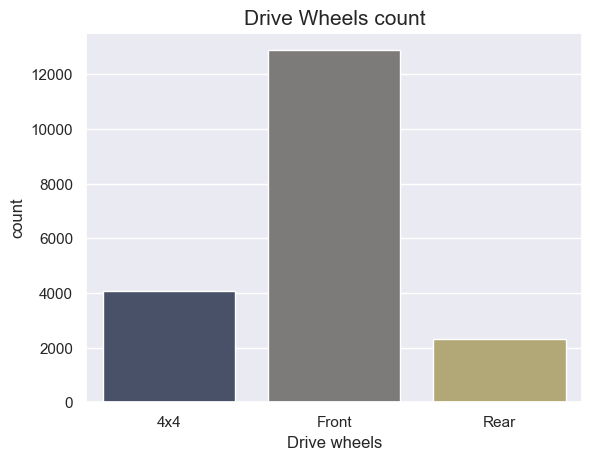

In [29]:
sns.countplot(data = df , x = 'Drive wheels', palette = 'cividis').set_title("Drive Wheels count", fontdict = {"size":15})

- Most cars have Front Drive wheel

Text(0.5, 1.0, 'Most Common Cars Colors')

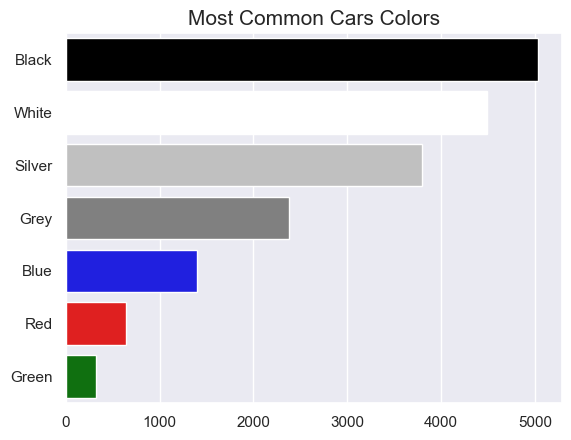

In [30]:
top7Color = df.Color.value_counts()[:7]
palette = {x : x for x in top7Color.index}
sns.barplot(x = top7Color.values, y = top7Color.index , palette = palette).set_title('Most Common Cars Colors', fontdict = {'size':15})

---
### 7. Frequency distribution table for continues numerical attributes<a id = 'numerical'></a>

In [31]:
# what are the continues numerical attributes in this dataset ? 
continuesAttributes = ['float16', 'float32', 'float64']
print("Continues Numerical Attributes: ")
for x in df.select_dtypes(include=continuesAttributes).columns:
    print(x)

Continues Numerical Attributes: 
Levy
Engine volume
Cylinders


- let's make frequency distribution tables for those columns

- *We will create a function to make a frequency table*

In [32]:
def frequencyTable(array):
    # 1. Calculate the range
    r = max(array) - min(array)
    # 2. Find the class limit using Sturge's rule
    k = round(1 + (3.3 * np.log10(array.size))/2)
    # 3. pandas will cacluate the class width and the frequencies
    x = array.value_counts(bins = k)

    # 4. convert to more organize data frame
    cl, cb, cm, fr = [],[],[],[]
    for a,b in x.items():
        climit = str(a).strip("-(])[").replace(',', ' -')
        freq = b
        #extract the class limits
        lower,upper = climit.split('-')
        lower_limit,upper_limit = round(float(lower), 2), round(float(upper), 2)
        # calculate the class boundaries
        lower_boun, upper_boun = lower_limit - 0.5, upper_limit + 0.5
        # calculate the class midpoint 
        cmd = round((lower_limit + upper_limit)/2)

        # add items to the lists
        cl.append(f"{lower_limit} - {upper_limit}") 
        cb.append(f"{lower_boun} - {upper_boun}")
        cm.append(cmd)
        fr.append(freq)

    # create the dataframe
    freqTable = pd.DataFrame({"Class Limit" : cl,
                             "Class Boundary" : cb,
                             "Class Midpoint" : cm,
                             "Frequency" : fr,})
    # add the cumulative and relative frequencies
    freqTable["Cumulative Frequency"] = freqTable.Frequency.cumsum()
    freqTable["Relative Freqency"] = round(freqTable.Frequency/array.dropna().size, 3)
    
    return(freqTable)

#### 1. Frequency Distribution table for Levy

In [33]:
levyTable = frequencyTable(df.Levy)
levyTable

,Class Limit,Class Boundary,Class Midpoint,Frequency,Cumulative Frequency,Relative Freqency
0,75.37 - 1540.38,74.87 - 1540.88,808,12478,12478,0.930
1,1540.38 - 2993.75,1539.88 - 2994.25,2267,894,13372,0.067
2,2993.75 - 4447.12,2993.25 - 4447.62,3720,27,13399,0.002
3,4447.12 - 5900.5,4446.62 - 5901.0,5174,12,13411,0.001
4,5900.5 - 7353.88,5900.0 - 7354.38,6627,3,13414,0.000
5,10260.62 - 11714.0,10260.12 - 11714.5,10987,3,13417,0.000
6,7353.88 - 8807.25,7353.38 - 8807.75,8081,1,13418,0.000
7,8807.25 - 10260.62,8806.75 - 10261.12,9534,0,13418,0.000


#### 2. Frequency Distribution table for Engine volume

In [34]:
engineTable = frequencyTable(df['Engine volume'])
engineTable

,Class Limit,Class Boundary,Class Midpoint,Frequency,Cumulative Frequency,Relative Freqency
0,0.02 - 2.5,-0.48 - 3.0,1,14893,14893,0.774
1,2.5 - 5.0,2.0 - 5.5,4,4156,19049,0.216
2,5.0 - 7.5,4.5 - 8.0,6,186,19235,0.010
3,17.5 - 20.0,17.0 - 20.5,19,2,19237,0.000
4,7.5 - 10.0,7.0 - 10.5,9,0,19237,0.000
5,10.0 - 12.5,9.5 - 13.0,11,0,19237,0.000
6,12.5 - 15.0,12.0 - 15.5,14,0,19237,0.000
7,15.0 - 17.5,14.5 - 18.0,16,0,19237,0.000


#### 3. Frequency Distribution table for Cylinders

In [35]:
cylindersTable = frequencyTable(df.Cylinders)
cylindersTable

,Class Limit,Class Boundary,Class Midpoint,Frequency,Cumulative Frequency,Relative Freqency
0,2.88 - 4.75,2.38 - 5.25,4,14474,14474,0.752
1,4.75 - 6.62,4.25 - 7.12,6,3631,18105,0.189
2,6.62 - 8.5,6.12 - 9.0,8,995,19100,0.052
3,0.98 - 2.88,0.48 - 3.38,2,80,19180,0.004
4,10.38 - 12.25,9.88 - 12.75,11,38,19218,0.002
5,8.5 - 10.38,8.0 - 10.88,9,13,19231,0.001
6,14.12 - 16.0,13.62 - 16.5,15,5,19236,0.000
7,12.25 - 14.12,11.75 - 14.62,13,1,19237,0.000


---
# Part 2:

---
## 1. Fill mising values with the mean of that column<a id = "fillNa"></a> 

In [36]:
# let's firts find the column with missing values 
df.isnull().sum()

Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Turbo                  0
dtype: int64

- we have only one column which is Levy

In [37]:
# filling the missing value with the mean of Leavy column 
df.Levy.fillna(df.Levy.mean(), inplace = True)

In [38]:
df.Levy.isnull().sum()

0

---
## 2. boxplots to indetify features with outliers, replace them with the mean of that feature<a id = "boxplot"></a>

<Axes: xlabel='Prod. year'>

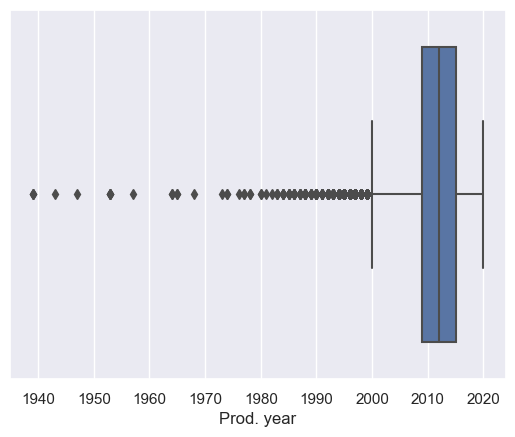

In [39]:
sns.boxplot( x = df['Prod. year'])

- all values under 2000 is consider as outlier 

<Axes: xlabel='Engine volume'>

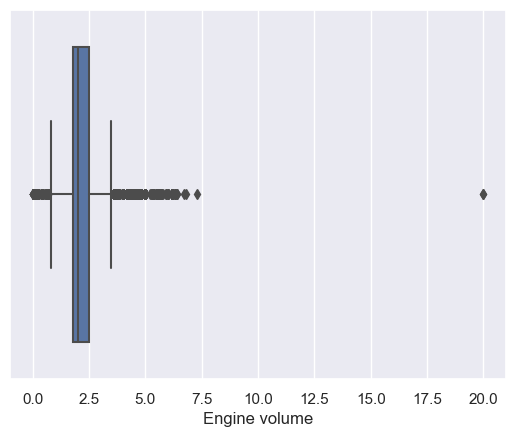

In [40]:
sns.boxplot( x = df['Engine volume'])

- Engine volume data graph is right skewed with many outliners on both sides 

<Axes: xlabel='Airbags'>

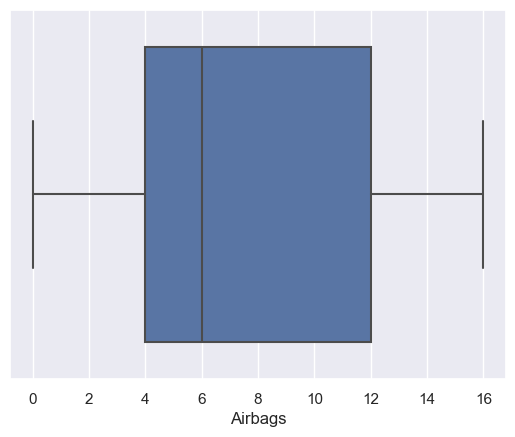

In [41]:
sns.boxplot(x = df.Airbags)

- Aribags feature does not have outliers

<Axes: xlabel='Price'>

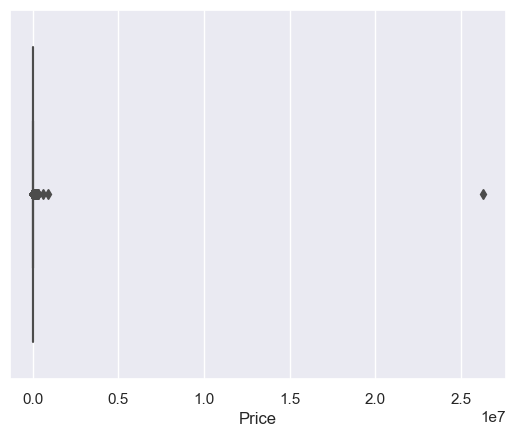

In [42]:
sns.boxplot(x = df.Price)

<Axes: xlabel='Levy'>

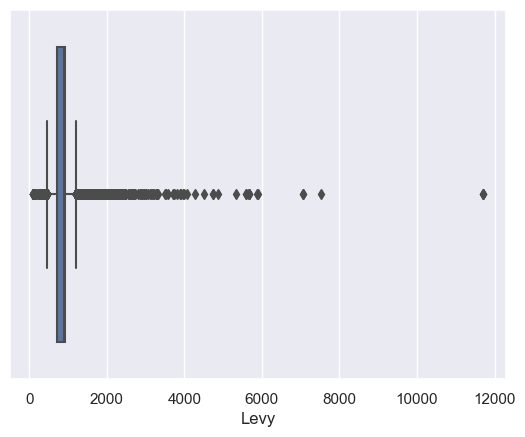

In [43]:
sns.boxplot(x = df.Levy)

<Axes: xlabel='Mileage'>

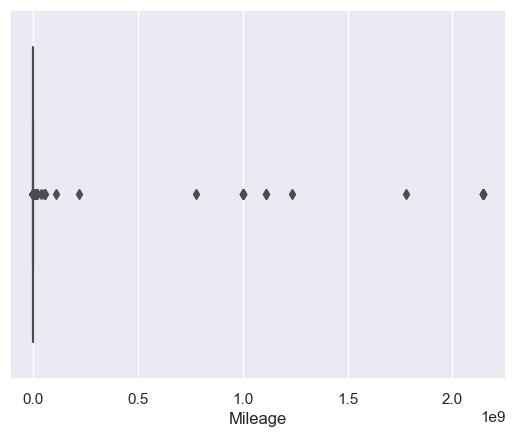

In [44]:
sns.boxplot(x = df.Mileage)

- **The Price, Levy, and Mileage boxplots show that there are extreme values that are either too large or too little to properly display the boxplot, let us substitute the mean for these values.**

- **Replace outliers with mean**

In [45]:
def replace_outliers(col):
    q1 = np.quantile(col, 0.25)
    q3 = np.quantile(col, 0.75)
    iqr = q3 - q1 
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    col[col < lower] = col.mean()
    col[col > upper] = col.mean()
    
    return col

In [46]:
# replace the outliers wtih mean for all the numerical features
for col in df.select_dtypes(np.number):
    df[col] = replace_outliers(df[col].copy())

---
## 3. LabelEncoder for categoircal features<a id = "labelEncoder"></a>

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cate_cols = list(df.select_dtypes(["object", "bool"]).columns)
for col in cate_cols:
    df[col] = encoder.fit_transform(df[col])

In [49]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328.0,930.144053,32,1242,2010.0,4,1,2,3.5,186005.0,4.604513,0,0,4.0,0,12,12,0
1,16621.0,1018.000000,8,658,2011.0,4,0,5,3.0,192000.0,4.604513,2,0,4.0,0,1,8,0
2,8467.0,906.838128,21,684,2006.0,3,0,5,1.3,200000.0,4.000000,3,1,4.0,1,1,2,0
3,3607.0,862.000000,16,661,2011.0,4,1,2,2.5,168966.0,4.000000,0,0,4.0,0,14,0,0
4,11726.0,906.838128,21,684,2014.0,3,1,5,1.3,91901.0,4.000000,0,1,4.0,0,12,4,0


---
## 4. Scale the features with minMax normalization<a id = "minMax"></a>

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_col = ["Price", "Levy", "Prod. year", "Engine volume", "Mileage", "Cylinders", "Doors", "Airbags"]
df[num_col] = scaler.fit_transform(df[num_col])

In [51]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,0.282837,0.639871,32,1242,0.50,4,1,2,1.000000,0.121395,1.0,0,0,1.0,0,12,0.750,0
1,0.352724,0.758435,8,658,0.55,4,0,5,0.814815,0.125307,1.0,2,0,1.0,0,1,0.500,0
2,0.179673,0.608419,21,684,0.30,3,0,5,0.185185,0.130528,0.0,3,1,1.0,1,1,0.125,0
3,0.076530,0.547908,16,661,0.55,4,1,2,0.629630,0.110274,0.0,0,0,1.0,0,14,0.000,0
4,0.248838,0.608419,21,684,0.70,3,1,5,0.185185,0.059978,0.0,0,1,1.0,0,12,0.250,0


---
## 5. convert to wide formate <a id = "convertWide"></a>

In [52]:
# This method melts a specific column
def melt(data_frame, col, data: dict, inplace: bool = False):
    lst = []
    if inplace:
        df = data_frame
    else:
        df = {}
    for da in data_frame[col]:
        if da in data:
            lst.append(data[da])
    for info in data:
        vals = []
        for i in range(len(lst)):
            vals.append(1 if lst[i] == data[info] else 0)
        df[data[info]] = vals
    if not inplace:
        df = pd.DataFrame(df)
    else:
        df.drop(col, inplace=True,axis=1)
    return df

In [53]:
# Need to specify the keys as the values in the dataframe and the values as their columns names
cols = {0:'Automatic',1:'Manual',2:'Triptronic',3:'Variator'}
melt(df, col='Gear box type', data=cols, inplace=True)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Automatic,Manual,Triptronic,Variator
0,0.282837,0.639871,32,1242,0.50,4,1,2,1.000000,0.121395,...,0,1.0,0,12,0.750,0,1,0,0,0
1,0.352724,0.758435,8,658,0.55,4,0,5,0.814815,0.125307,...,0,1.0,0,1,0.500,0,0,0,1,0
2,0.179673,0.608419,21,684,0.30,3,0,5,0.185185,0.130528,...,1,1.0,1,1,0.125,0,0,0,0,1
3,0.076530,0.547908,16,661,0.55,4,1,2,0.629630,0.110274,...,0,1.0,0,14,0.000,0,1,0,0,0
4,0.248838,0.608419,21,684,0.70,3,1,5,0.185185,0.059978,...,1,1.0,0,12,0.250,0,1,0,0,0


---
## 6. ANOVA & F-statistics<a id ="anova"></a>

In [54]:
def f_stats(X,y,df):
    corr = df[X].corr(df[y])
    f_test = (corr**2)/(1-(corr**2)) * (len(X)-1)
    return corr

In [55]:
f_statistics = {}
cols = list(df.drop("Price", axis = 1 ).columns)
for col in cols:
    f_statistics[col] = f_stats("Price",col,df)

(array([-0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,
         0.25,  0.3 ]),
 [Text(-0.2, 0, '−0.20'),
  Text(-0.15000000000000002, 0, '−0.15'),
  Text(-0.1, 0, '−0.10'),
  Text(-0.04999999999999999, 0, '−0.05'),
  Text(0.0, 0, '0.00'),
  Text(0.04999999999999999, 0, '0.05'),
  Text(0.10000000000000003, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.3, 0, '0.30')])

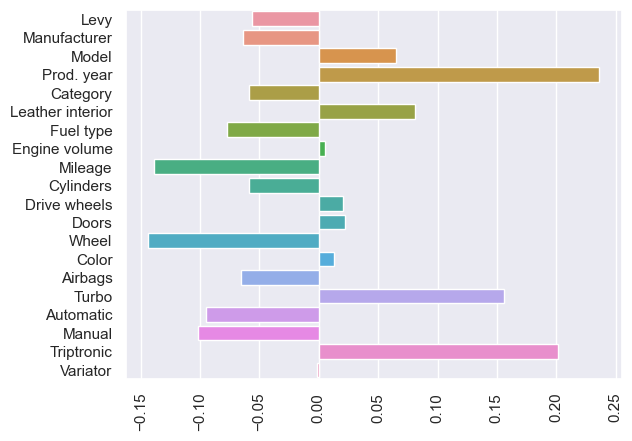

In [56]:
sns.barplot(y = list(f_statistics.keys()), x = list(f_statistics.values()))
plt.xticks(rotation=90)

- From the F-test barplot we can see that the irrelevant features are:
1. Engine volume 
2. Color 
3. Drive wheels 
4. Doors
5. Variator